In [5]:
import pandas as pd

# Load the training and testing sets
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')

# Display the shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5634, 20)
X_test shape: (1409, 20)
y_train shape: (5634, 1)
y_test shape: (1409, 1)


In [6]:
from sklearn.linear_model import LogisticRegression

# Drop the customerID column (if present)
if 'customerID' in X_train.columns:
    X_train = X_train.drop('customerID', axis=1)
    X_test = X_test.drop('customerID', axis=1)

# Initialize the model
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
model.fit(X_train, y_train.values.ravel())

print("Model training complete!")

Model training complete!


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Accuracy: 0.8169
Precision: 0.6803
Recall: 0.5818
F1-Score: 0.6272
AUC-ROC: 0.8615


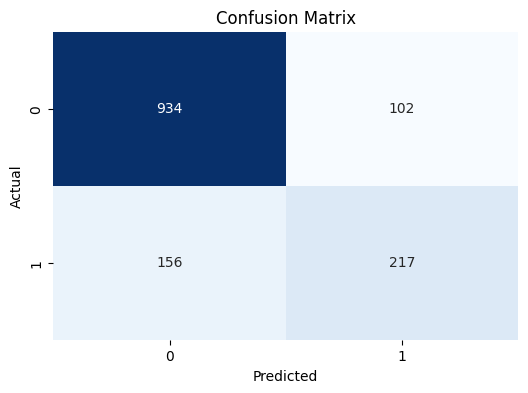

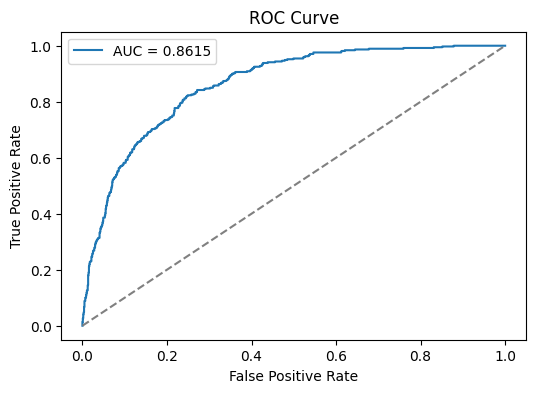

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [10]:
import joblib

# Save the model to a file
joblib.dump(model, '../models/logistic_regression_baseline.pkl')

print("Model saved to '../models/logistic_regression_baseline.pkl'.")

Model saved to '../models/logistic_regression_baseline.pkl'.
